# Battle of the Cities: Data Visualization
### Goals:

* __bar chart of rent prices by neighborhood for each city__
* __find median rent for 2018 and 2018 per neighborhood per city__
* ~~is rent price above national average? (folium)~~
    * looking at two of the most expensive cities in the country, this may not give much insight
    * overall average? normalize data to see how it relates to the mean
* is rent prive above city average? (folium)(City_Rank)
    * ex: "This neighorhood is affordable relative to other Manhattan neighborhoods.

* label neighborhoods: Affordable, Average, Expensive within city and within whole dataset
    * ex: General Rank = Expensive, City Rank = Affordable
    * "This neighborhood is expensive relative to both San Francisco and Manhattan but affordable for Manhattab.
* box plots

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import json
import folium
from folium import plugins

In [3]:
rent_data = pd.read_csv('rent_data_clean.csv', index_col = 0)
rent_data.head(2)

City  2018-01  2018-02  2018-03  2018-04  2018-05  \
Neighborhood                                                             
Upper West Side  New York   4395.0   4300.0   4354.0   4531.0   4632.0   
Upper East Side  New York   4606.0   4384.0   4401.0   4622.0   4823.0   

                 2018-06  2018-07  2018-08  2018-09  ...  2018-12  2019-01  \
Neighborhood                                         ...                     
Upper West Side   4606.0   4471.0   4288.0   4157.0  ...   4166.0   4256.0   
Upper East Side   4744.0   4546.0   4367.0   4236.0  ...   4254.0   4361.0   

                 2019-02  2019-03  2019-04  2019-05  2019-06  2019-07  \
Neighborhood                                                            
Upper West Side   4214.0   4148.0   4109.0   4086.0   4071.0   4061.0   
Upper East Side   4341.0   4240.0   4141.0   4038.0   3944.0   3905.0   

                 2019-08  2019-09  
Neighborhood                       
Upper West Side   4030.0   4053.0  
Upper East Side   3899.0   3941.0  

[2 rows x 22 columns]

First I want to find the median rent price for each neighborhood since January 2018. I'll use this data to compare rent prices among neighborhoods and see the distribution of rent prices for each city.

In [4]:
for row in rent_data.iterrows():
    rent_data["Median_Rent"] = rent_data.median(axis=1)

In [5]:
nyc_data = rent_data[rent_data["City"] == "New York"]
sf_data = rent_data[rent_data["City"] == "San Francisco"]

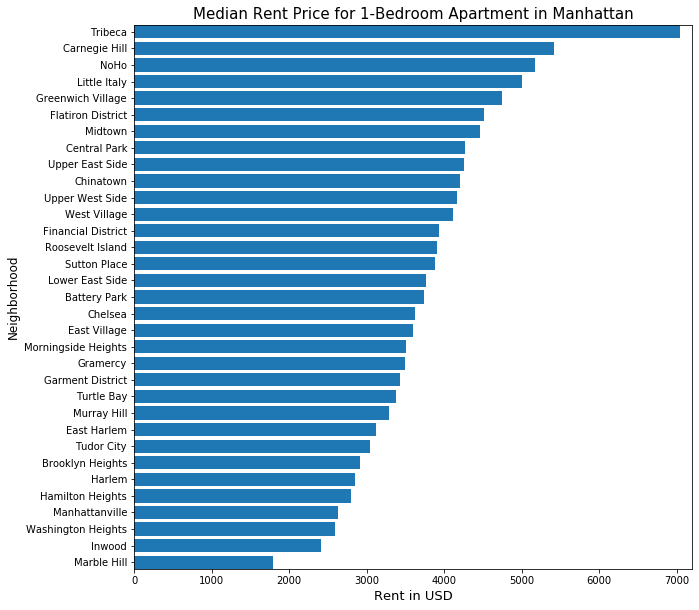

In [13]:
nyc_sort = nyc_data.copy()
nyc_sort.sort_values('Median_Rent', ascending=True, inplace=True)

fig = plt.figure(figsize=(10, 10))

plt.barh(nyc_sort.index, nyc_sort.Median_Rent)
plt.margins(0.20, 0)
plt.title("Median Rent Price for 1-Bedroom Apartment in Manhattan", size=15)
plt.xlabel("Rent in USD", size=13)
plt.xlim(0,7200)
plt.ylabel("Neighborhood", size=12)

plt.show()

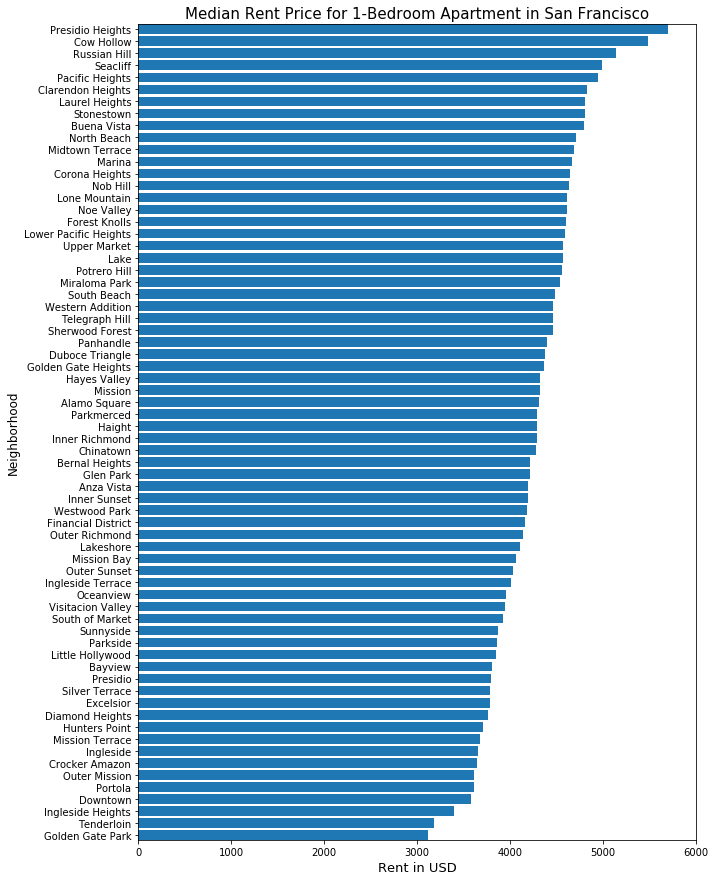

In [14]:
sf_sort = sf_data.copy()
sf_sort.sort_values('Median_Rent', ascending=True, inplace=True)

fig = plt.figure(figsize=(10, 15))

plt.barh(sf_sort.index, sf_sort.Median_Rent)
plt.margins(0.20, 0)
plt.title("Median Rent Price for 1-Bedroom Apartment in San Francisco", size=15)
plt.xlabel("Rent in USD", size=13)
plt.xlim(0,6000)
plt.ylabel("Neighborhood", size=12)

plt.show()